<a href="https://colab.research.google.com/github/flexinJ/flexinBot/blob/main/flexinBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
# Downloading required packages
!pip install yfinance
!pip install numpy
!pip install pandas
!pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [282]:
# Import of the necessary modules
import numpy as np
import pandas as pd
import math
import yfinance as yf
from hurst import compute_Hc
import matplotlib.pyplot as plt

In [283]:
######################## Welcome ##########################
# Based in fibo sequence.
# Flexin (@moraisjota) make this ~ enjoy xD
######################## FlexinBot ########################

In [284]:
# Wallet
wallet = ['EURUSD=X', 'JPY=x']
# Database
database = pd.DataFrame()
# Wallet verification loop
##############

In [285]:
# Symbol parameters definition
symbol = 'BTC-USD'
dateRange = '1mo'
timeFrame = '15m'
# Finance database import
data = yf.Ticker(symbol).history(period=dateRange, interval=timeFrame)
data.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)

In [286]:
######################## Indicators ########################
# Moving average
# 8, 13 and 55 periods (EMA, Adj close)
data['mA8'] = data['Close'].ewm(span=8, min_periods=8).mean()
data['mA13'] = data['Close'].ewm(span=13, min_periods=13).mean()
data['mA55'] = data['Close'].ewm(span=55, min_periods=55).mean()
# Ichimoku Cloud
# 8, 21 and 55 periods
data['tenkanSen'] = (data['High'].rolling(window=8).max()+data['High'].rolling(window=8).min())/2
data['kijunSen'] = (data['High'].rolling(window=21).max()+data['Low'].rolling(window=21).min())/2
data['senkouA'] = ((data['tenkanSen']+data['kijunSen'])/2).shift(21)
data['senkouB'] = ((data['High'].rolling(window=55).max()+data['Low'].rolling(window=55).min())/2).shift(21)
# Relative Strength Index (RSI)
# 21 periods (close)
diff = data['Close'].diff()
diffUp = diff.clip(lower=0)
diffDown = -1*diff.clip(upper=0)
averageGain = diffUp.ewm(span=21, min_periods=21).mean()
averageLoss = abs(diffDown.ewm(span=21, min_periods=21).mean())
relativeStrength = averageGain / averageLoss
data['RSI'] = RSI = 100.0 - (100.0 / (1.0 + relativeStrength))
# Calculate series of Log return of close prices
data['logCloseReturn'] = np.log(data['Close']/data['Close'].shift(1))

In [287]:
######################## Hurst exponent filter ########################
'''
H = 0.5 — Brownian motion
0.5 < H < 1.0 — persistent behavior
0 < H < 0.5 — anti-persistent behavior
'''
# Funcion def calculate Hurst Exponent (available on github on https://github.com/Mottl/hurst)
H = lambda x: compute_Hc(x)[0]
data['Hurst'] = data['logCloseReturn'].rolling(window=128).apply(H)

Hurst exponent is 0.3056


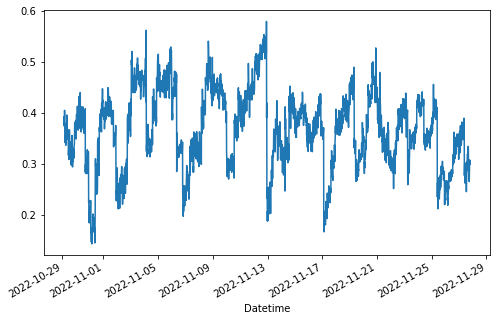

In [288]:
# Plot the Hurst exponent graphic
data['Hurst'].plot(figsize=(8, 5))
print('Hurst exponent is', data['Hurst'][-1].round(4))

In [289]:
# Dealing with NaN data
data.dropna(inplace=True, axis=0)
# Visualize database
data.tail()

,Open,High,Low,Close,mA8,mA13,mA55,tenkanSen,kijunSen,senkouA,senkouB,RSI,logCloseReturn,Hurst
Datetime,,,,,,,,,,,,,,
2022-11-27 18:00:00+00:00,16537.017578,16542.558594,16537.017578,16540.861328,16545.448095,16548.762514,16547.403712,16556.678711,16555.40918,16556.235840,16513.039062,43.288572,0.000229,0.285060
2022-11-27 18:15:00+00:00,16541.449219,16547.275391,16538.546875,16547.275391,16545.854161,16548.550068,16547.399129,16555.733398,16555.40918,16556.235840,16513.039062,47.879879,0.000388,0.291308
2022-11-27 18:30:00+00:00,16547.677734,16555.013672,16547.677734,16554.443359,16547.762872,16549.391967,16547.650709,16554.755859,16555.40918,16556.235840,16519.247070,52.597496,0.000433,0.307848
2022-11-27 18:45:00+00:00,16554.943359,16554.943359,16554.943359,16554.943359,16549.358536,16550.185023,16547.911160,16546.851562,16555.40918,16556.235840,16519.247070,52.924444,0.000030,0.298965
2022-11-27 18:46:00+00:00,16555.564453,16555.564453,16555.564453,16555.564453,16550.737628,16550.953513,16548.184492,16547.126953,16555.40918,16556.154785,16519.247070,53.363965,0.000038,0.305598


In [290]:
# Capturing all required current values of variables
currentValues = dict()
# Close price
currentValues['currentClosePrice'] = currentClosePrice = data['Close'][-1]
# Open price
currentValues['currentOpenPrice'] = currentOpenPrice = data['Open'][-1]
# Moving average
currentValues['currentMa8'] = currentMa8 = data['mA8'][-1]
currentValues['currentMa13'] = currentMa13 = data['mA13'][-1]
currentValues['currentMa55'] = currentMa55 = data['mA55'][-1]
# Ichimoku Cloud
currentValues['currentSenkouA'] = currentSenkouA = data['senkouA'][-1]
currentValues['currentSenkouB'] = currentSenkouB = data['senkouB'][-1]
# RSI
currentValues['currentRsi'] = currentRsi = data['RSI'][-1]
# Hurst exponent
currentValues['currentHurst'] = currentHurst = data['Hurst'][-1]

In [291]:
 # Strategy
## Buy
if currentOpenPrice > currentMa8 and currentClosePrice > currentMa8 and currentMa8 > currentMa13 and currentMa13 > currentSenkouA and currentSenkouA > currentSenkouB and currentRSI > 50 and 1 > currentHurst > 0.5:
  print('Buy')
else:
  print('Wait')
  
### Sell
if currentOpenPrice < currentMa8 and currentClosePrice < currentMa8 and currentMa8 < currentMa13 and currentMa13 < currentSenkouA and currentSenkouA < currentSenkouB and currentRSI < 50 and 1 > currentHurst > 0.5:
  print('Sell')
else:
  print('Wait')

Wait
Wait
